# Hysteresis loop calculation

In this example we calculate the hysteresis loop of a magnetic waveguide with a round wire cross section (R=50 nm radius) and permalloy material parameters. 

In [1]:
import tetrax as tx
import numpy as np # will be required for code parts meant to collect the average magnetization for each field step

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sample = tx.create_sample(name="Round_wire_R_50nm")
sample.Msat = 800e3
sample.Aex = 13e-12
mesh = tx.geometries.round_wire_cross_section(R=50)
sample.set_geom(mesh)

This sample does not have a mesh yet. You cannot set spatially dependent saturation for it.
This sample does not have a mesh yet. You cannot set spatially dependent exchange stiffness for it.
Setting geometry and calculating discretized differential operators on mesh.
Done.


In the next step we define the min and max field values, the step size. In a for loop over the static external field values we set the external field to the current value, we relax the magnetization and calculate the volume averaged x, y and z components, that are collected to an ```aver_mag``` list. Thes list will be converted into a numpy array and plotted.

In [3]:
Bmin = -1 # min. static field value in [T]
Bmax = 1 # max. static field value in [T]
Bstep = 5e-3 # field step in [T]

exp = tx.create_experimental_setup(sample)
# we define a homogeneous vectorfield in the x direction (theta=90,phi=0)
bhom = tx.vectorfields.homogeneous(sample.xyz, 90, 0)
# external field values in a numpy array: ext_fields
ext_fields = np.arange(Bmin,Bmax+Bstep,Bstep)
sample.mag = tx.vectorfields.homogeneous(sample.xyz, 60.0, 0.0) # arguments (coordinate, theta, phi)

aver_mag = []

for Bstat in ext_fields:
    exp.Bext = Bstat * bhom # setting a homogeneous static field
    nr_trial = 0
    success = False
    while (not(success) and (nr_trial < 5)):
        success = exp.relax(tol=1e-13,continue_with_least_squares=True,verbose=False) # relaxation
        nr_trial += 1
    aver_m = tx.sample_average(sample.mag, sample) # computing the average mx, my, mz
    aver_mag.append(aver_m) # collecting for each field step

<IPython.core.display.Javascript object>


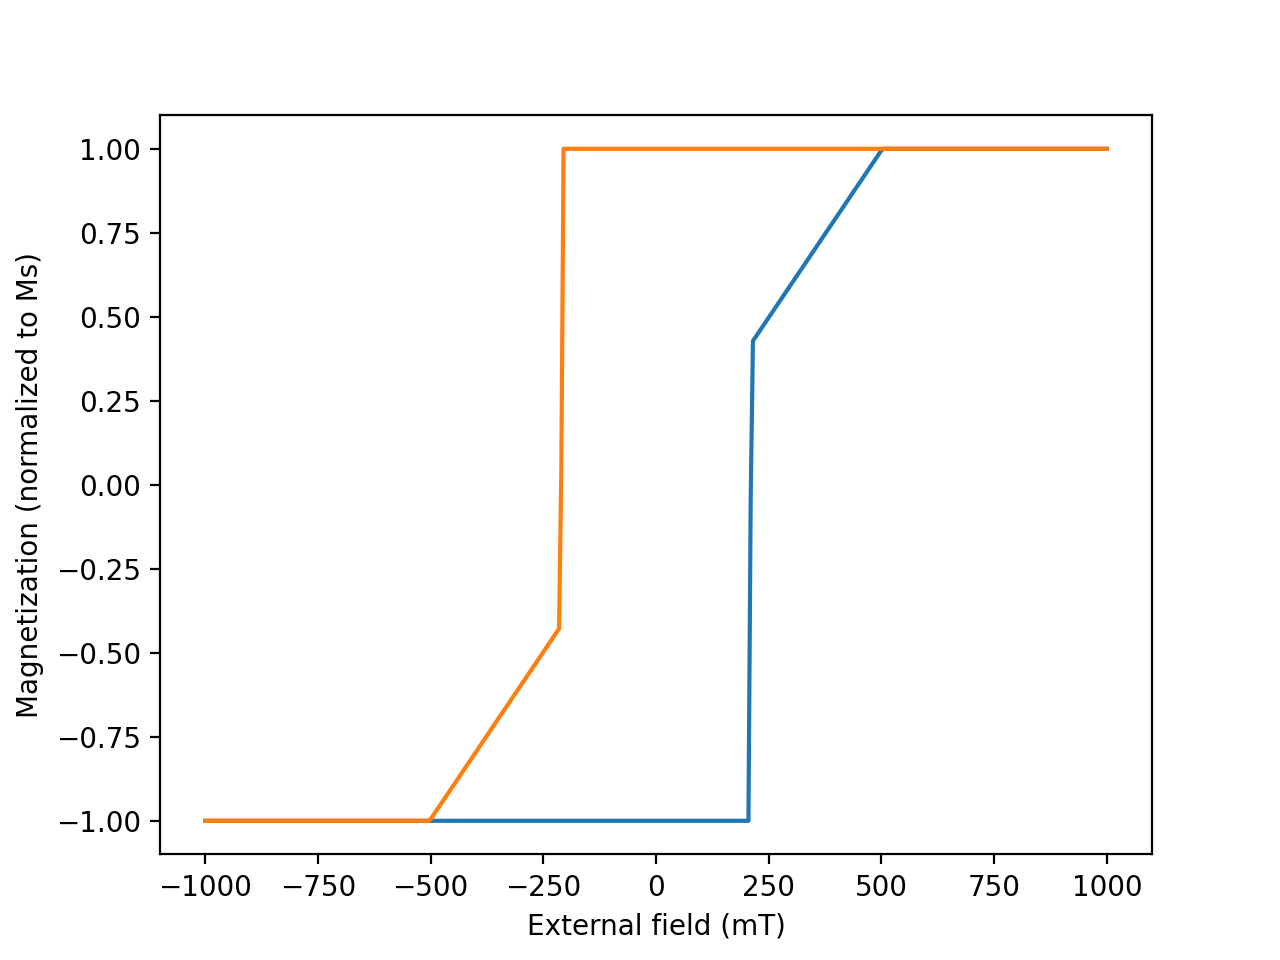

In [4]:
aver_mag = np.array(aver_mag)
plt.plot(ext_fields*1e3,aver_mag[:,0])
plt.plot(-ext_fields*1e3,-aver_mag[:,0]) # here we only mirror the first loop to get a hysteresis
plt.xlabel("External field (mT)")
plt.ylabel("Magnetization (normalized to Ms)")
plt.show()

NOTE: As mentioned in the documentation, for waveguide samples, the equilibration is not totally stable yet. Please use with care and check the resulting equilibrium states. Therefore might happen that re-running the hysteresis loop without changing any para,meters might lead to different results.